# Logistic Regression - Rains in Australia Dataset


The binary logistic regression classifier consider random variables $\mathbf X$, $T \in\{0,1\}$  where
 \begin{align*}
 Y &= \mathsf{\sigma}(\mathbf w^t\mathbf X) = \sigma( w_0 + \sum_{k=1}^{K-1} w_kX_k),\\
 p(t\mid \mathbf w)  &\sim y^{t}(1-y)^{(1-t)},\\
 \sigma(z) &= \frac{1}{1+e^{-z}},\\ 
 z &= w_0 + \sum_{k=1}^{K-1} w_kX_k,
 \end{align*}
$ \mathbf w^t = [w_0, w_1,\dots,w_{K-1}]$, $\mathbf X = [1, X_1,\dots,X_{K-1}]^t$, and the conditional class probabilities are  $P(C_1\mid X, \mathbf w) = Y$, and $P(C_2\mid X,\mathbf w) = 1 - P(C_1\mid X, \mathbf w) $. 
 
The classification rule for input $\mathbf X= \mathbf x$ is defined as follows:

\begin{align*}
f(\mathbf x) = \left\{
\begin{array}{ll}
        1 & \mbox{if } \sigma(\mathbf w^t\mathbf x) > 0.5 \\
        0& \mbox{otherwise.}
 \end{array}
 \right.
\end{align*}

Given a data set $\mathcal D = \{ \{\mathbf x_1,t_2,\}, \{\mathbf x_1,t_2\}, \dots, \{\mathbf x_N,t_N\}\}$ we need to estimate the  $\mathbf w$  classifier parameters. The  likelihood of the data is given by

\begin{align*}
\mathcal L(\mathbf  w \mid \mathcal D) &= \prod_{n=1}^N p(t_n\mid \mathbf w) = \prod_{n=1}^N  \left[ y_n^{t_n} (1-y_n)^{(1-t_n)}\right].
\end{align*}

The cross-entropy error function is defined as

\begin{align*}
E[ \mathbf w ] &= - \log L(\mathbf  w \mid \mathcal D) = -\sum_{n=1}^N \log  p(t_n\mid \mathbf w) = -\sum_{n=1}^N \log \left[ y_n^{t_n} (1-y_n)^{(1-t_n)}\right] = -\sum_{n=1}^N \left[ t_n \log y_n + {(1-t_n) \log (1-y_n)}\right]
\end{align*}


> ## Import the libraries and read the dataset

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'../data/weatherAUS.csv')

> ## Print the values

In [106]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


> ## Exploratory data analysis

In [107]:
data.shape # number of variables and records

(145460, 23)

In [108]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [110]:
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [111]:
categorical_features = list(data.select_dtypes(include='object').columns)

In [112]:
print('There are {} categorical variables\n'.format(len(categorical_features)))

print('The categorical variables are :', categorical_features)


There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [113]:
numerical_features = list(data.select_dtypes(exclude='object').columns)

In [114]:
print('There are {} numerical variables\n'.format(len(numerical_features)))

print('The numerical variables are :', numerical_features)

print(round(data[numerical_features].describe()),2)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  Wind

In [115]:
data[categorical_features].isnull().any()

Date            False
Location        False
WindGustDir      True
WindDir9am       True
WindDir3pm       True
RainToday        True
RainTomorrow     True
dtype: bool

In [116]:
print('WindGustDir contains', len(data['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [117]:
data.WindGustDir.unique()


array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [118]:
data['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [119]:
data['WindGustDir'].fillna(data['WindGustDir'].value_counts().index[0],inplace=True)

In [120]:
data['WindGustDir'].value_counts().index[0]

'W'

In [121]:
data.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [122]:
data['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [123]:
data['WindDir9am'].fillna(data['WindDir9am'].value_counts().index[0],inplace=True)

In [124]:
data['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [125]:
data['WindDir3pm'].fillna(data['WindDir3pm'].value_counts().index[0],inplace=True)

In [126]:
data['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [127]:
data['RainToday'].fillna(data['RainToday'].value_counts().index[0],inplace=True)

In [128]:
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [129]:
data['RainTomorrow'].fillna(data['RainTomorrow'].value_counts().index[0],inplace=True)
print(data['RainTomorrow'].value_counts().index[0])

No


In [130]:
data[categorical_features].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [131]:
data[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

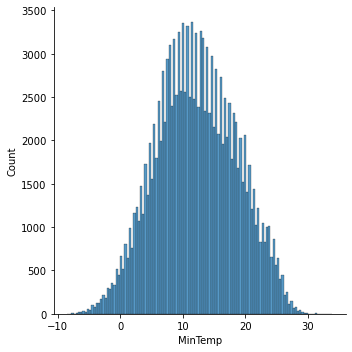

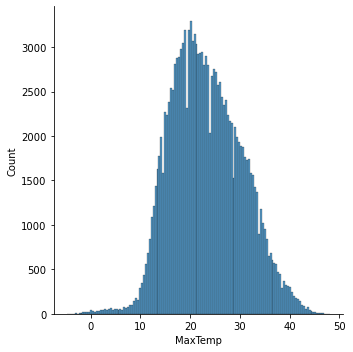

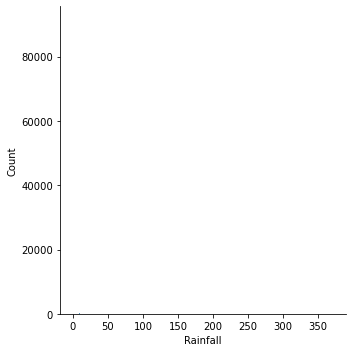

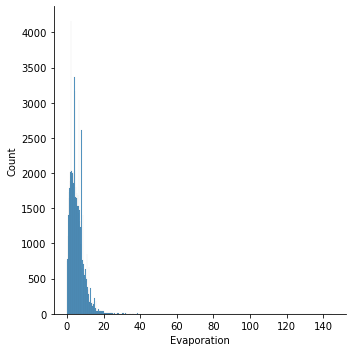

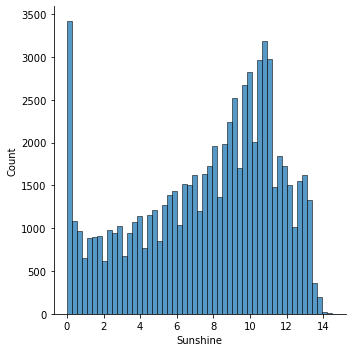

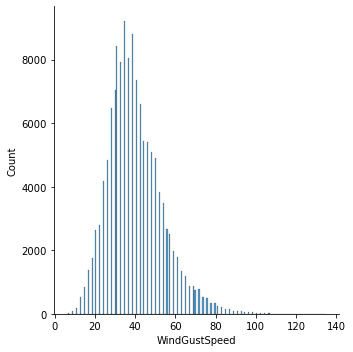

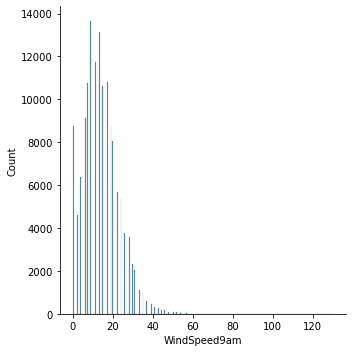

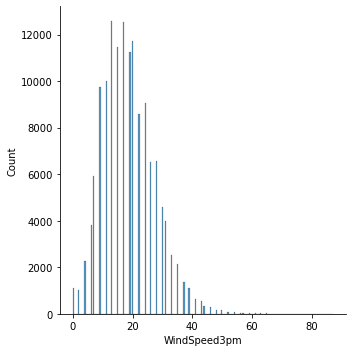

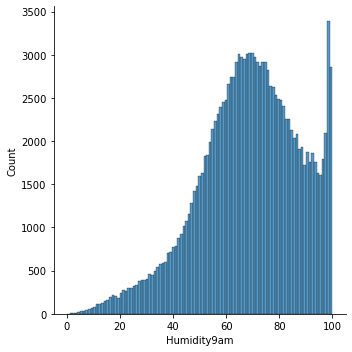

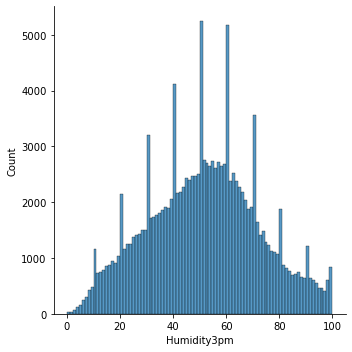

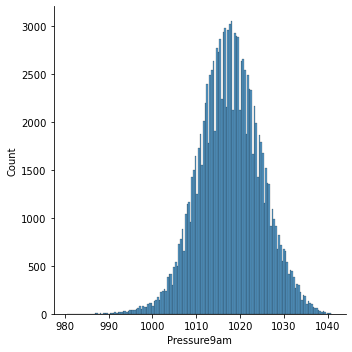

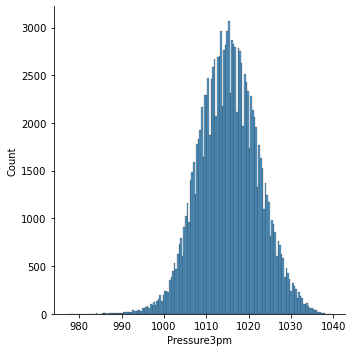

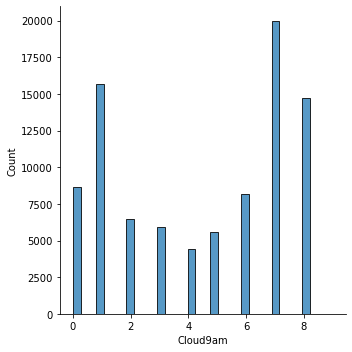

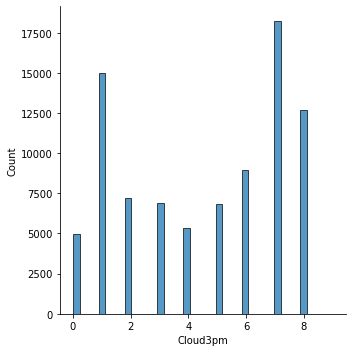

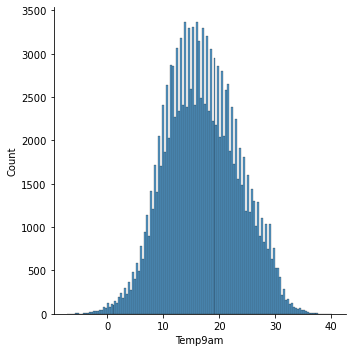

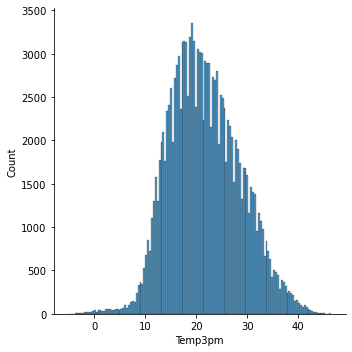

In [132]:
for i in numerical_features:
    sns.displot(data[i])
    plt.show()

In [133]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [134]:
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mean())
data['Evaporation'] = data['Evaporation'].fillna(data['Evaporation'].mean())
data['Sunshine'] = data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Humidity3pm'].mean())
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [135]:
data[numerical_features].isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
dtype: bool

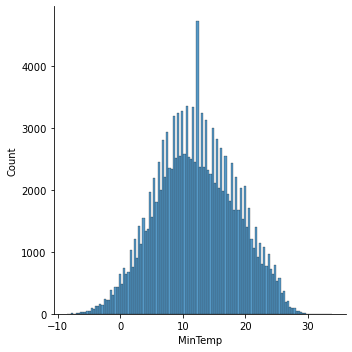

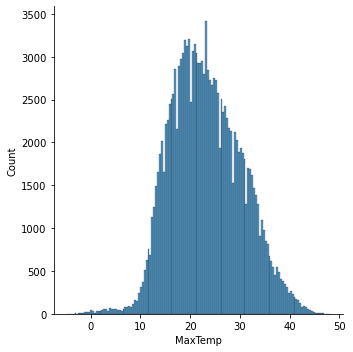

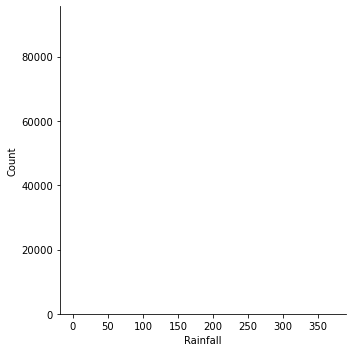

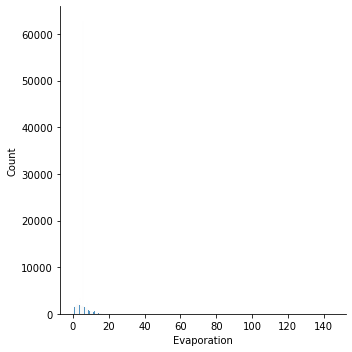

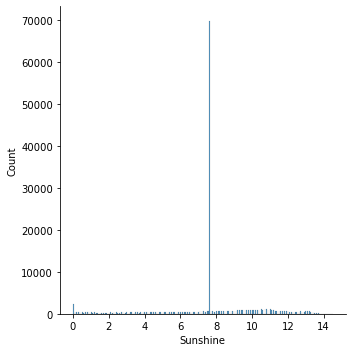

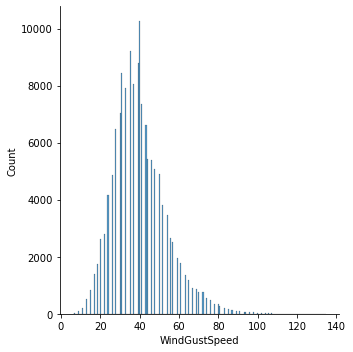

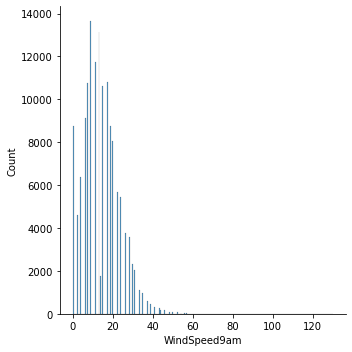

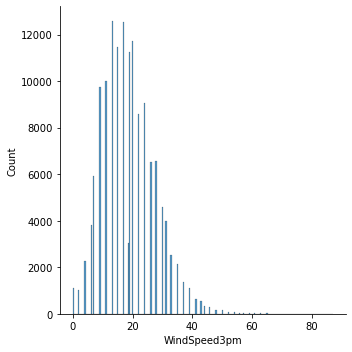

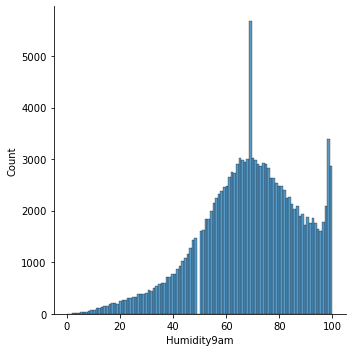

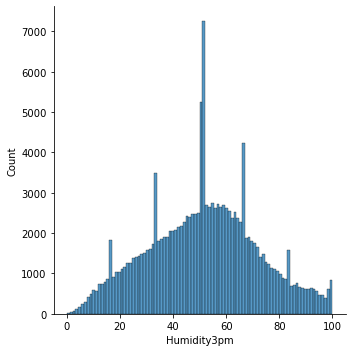

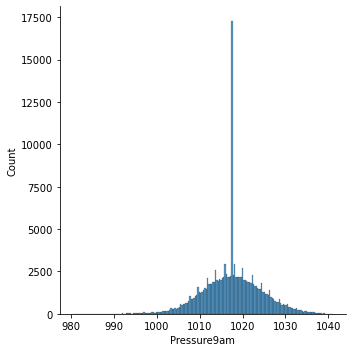

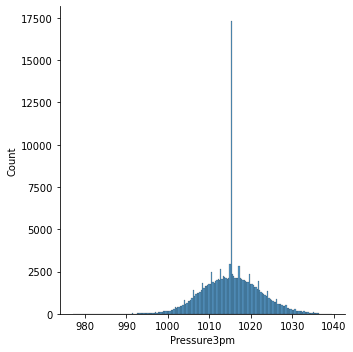

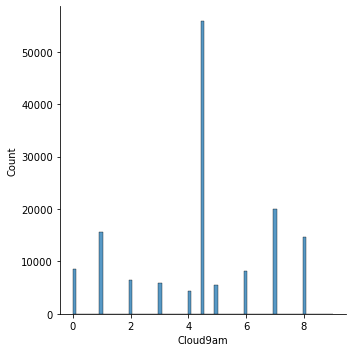

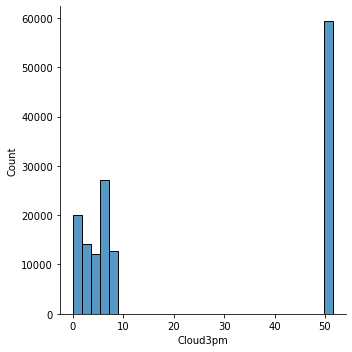

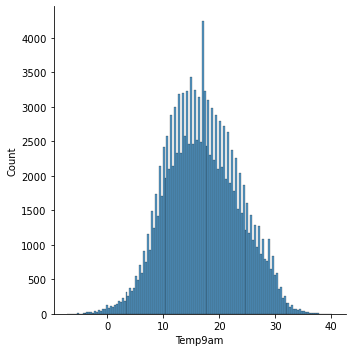

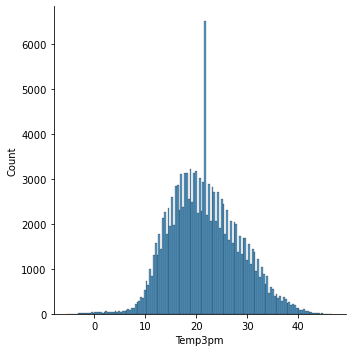

In [193]:
data.isnull().any()

for i in numerical_features:
    sns.displot(data[i])
    plt.show()

#### Null values have been handled

### We check for outliers  

In [137]:
import numpy as np
def iqr(data,col):
    q1,q3 = np.percentile(data[col],[25,75])
    iqr = q3-q1 
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    data = data[(data[col]>lower) & (data[col]<upper)]
    data.boxplot(col)

In [138]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

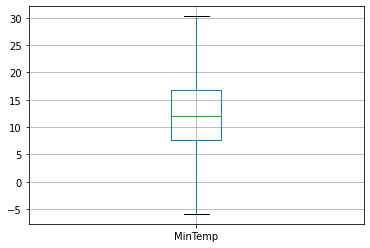

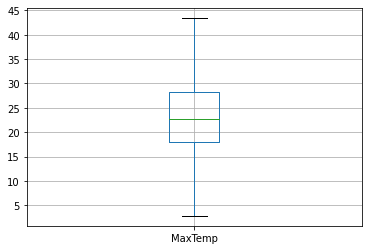

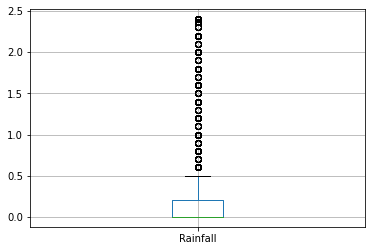

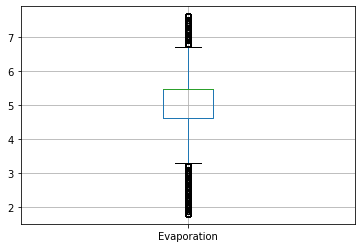

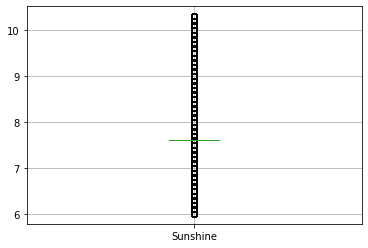

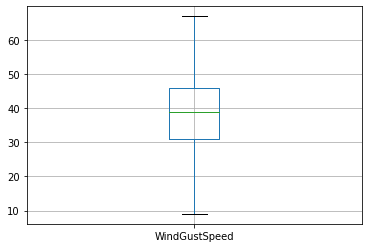

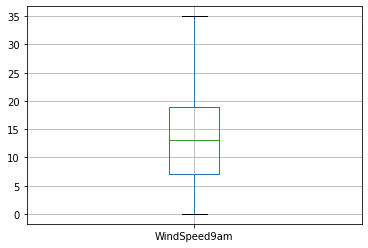

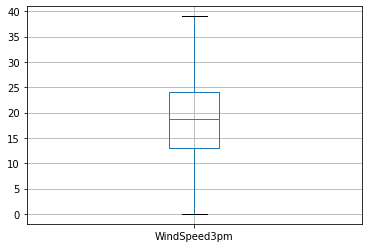

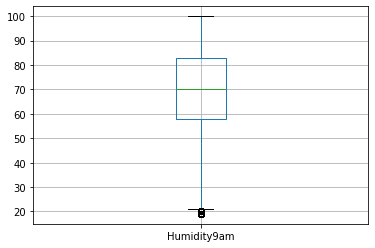

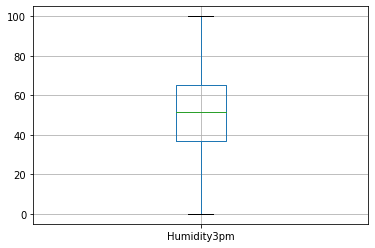

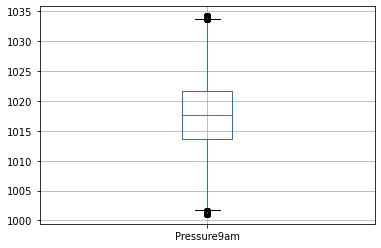

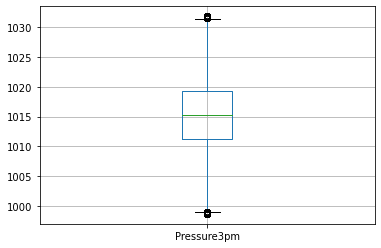

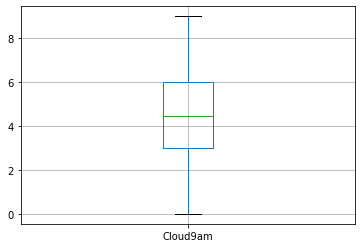

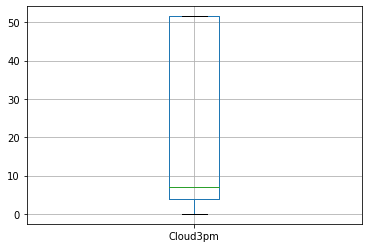

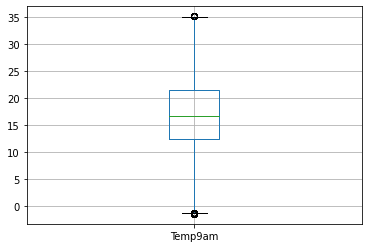

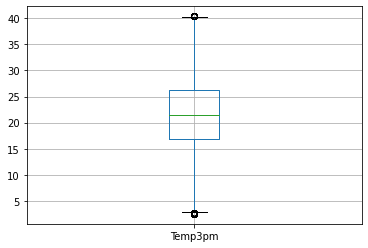

In [139]:
for i in numerical_features:
    iqr(data,i)
    plt.show()

In [140]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,51.539116,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,51.539116,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,51.539116,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [141]:
data['Date'].dtypes

dtype('O')

In [142]:
data['Date'] = pd.to_datetime(data['Date'])

In [143]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [144]:
data.drop(['Date'],inplace=True,axis=1)

In [145]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,1007.1,8.000000,51.539116,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,1007.8,4.447461,51.539116,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,1008.7,4.447461,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,1012.8,4.447461,51.539116,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


### Label encoding

In [146]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [147]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
for i in data.select_dtypes(include='object').columns:
    data[i] = Label_Encoder.fit_transform(data[i].astype(str))
    print(data[i])

0          2
1          2
2          2
3          2
4          2
          ..
145455    41
145456    41
145457    41
145458    41
145459    41
Name: Location, Length: 145460, dtype: int64
0         13
1         14
2         15
3          4
4         13
          ..
145455     0
145456     6
145457     3
145458     9
145459    13
Name: WindGustDir, Length: 145460, dtype: int64
0         13
1          6
2         13
3          9
4          1
          ..
145455     9
145456     9
145457     9
145458    10
145459     2
Name: WindDir9am, Length: 145460, dtype: int64
0         14
1         15
2         15
3          0
4          7
          ..
145455     1
145456     3
145457    14
145458     3
145459     2
Name: WindDir3pm, Length: 145460, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainToday, Length: 145460, dtype: int64
0         0
1         0
2         0
3         0
4         0
   

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

### All the features are now numerical

> ### Store the value of features and target output in seperate DataFrames

In [149]:
x = data.drop(['RainTomorrow'],axis=1).values
y = data['RainTomorrow'].values

> ### Split into training and testing set

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100) 

In [151]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(101822, 24)
(101822,)
(43638, 24)
(43638,)


> ## Feature Scaling

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

[[ 1.49426727 -0.40370708  0.15603939 ...  0.08919134  1.63549135
  -0.98978253]
 [ 0.86067713  1.38059334  2.21350772 ... -1.48679833  1.34337108
   1.05855302]
 [ 0.43828369  0.81713005  0.35333087 ... -0.30480608 -0.99359105
   0.48957092]
 ...
 [ 0.64948041 -1.01412565 -1.56321497 ...  1.27118359  0.17489002
   1.28614586]
 [-1.32168894 -0.95151861 -1.18272426 ... -0.69880349  0.75913055
  -0.30700401]
 [ 1.28307056 -0.40370708  0.14194714 ...  0.48318875 -0.40935051
   0.83096018]]


> ### Apply logistic regression and fit the model

In [153]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

> ### Predict the values

In [177]:
y_pred = log_reg.predict(x_test)

array([1, 0, 1, ..., 0, 0, 0])

predict_proba method\
predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.\
0 is for probability of no rain and 1 is for probability of rain.

In [156]:
log_reg.predict_proba(x_test)[:,0]

array([0.39326057, 0.94468178, 0.25416287, ..., 0.90587834, 0.99488875,
       0.94264164])

In [157]:
log_reg.predict_proba(x_test)[:,1]

array([0.60673943, 0.05531822, 0.74583713, ..., 0.09412166, 0.00511125,
       0.05735836])

> ## Check accuracy score

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8415601081626106

In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[32269,  1770],
       [ 5144,  4455]])

In [160]:
print('Training set score: {:.4f}'.format(log_reg.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(x_test, y_test)))

Training set score: 0.8428
Test set score: 0.8416


two values are quite comparable. So, there is no question of overfitting.

In [161]:
y_test = pd.DataFrame(y_test)

In [162]:
y_test.value_counts()

0    34039
1     9599
dtype: int64

> ## Check null accuracy score


In [163]:
null_accuracy = (34039/(34039+9599))
print(null_accuracy)

0.7800311654979605


> ## Classification Report

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     34039
           1       0.72      0.46      0.56      9599

    accuracy                           0.84     43638
   macro avg       0.79      0.71      0.73     43638
weighted avg       0.83      0.84      0.83     43638



> ## Confusion Matrix

<AxesSubplot:>

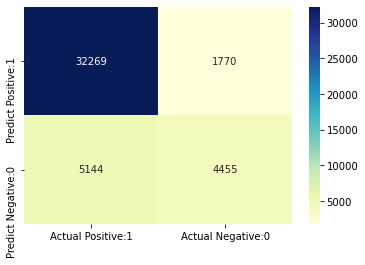

In [165]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

> ## Classification accuracy

In [166]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [167]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_accuracy

0.8415601081626106

> ## Classification error

In [168]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
classification_error

0.15843989183738943

> ## Precision

In [169]:
precision = TP / float(TP + FP)
precision

0.9480008225858574

> ## Recall

In [174]:
recall = TP / float(TP + FN)
recall


0.8625076844946944

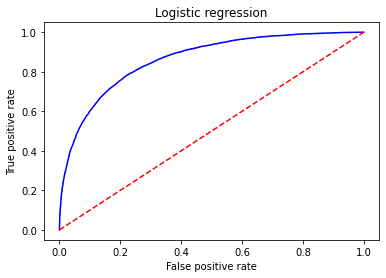

AUC 0.8619037150418035


In [192]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = log_reg.predict_proba(x_test)[:,1]

fpr, tpr, threshholds = roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,'b', label='Logistic regression')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic regression')
plt.show()

print('AUC', roc_auc_score(y_test,y_pred_prob))


